In [1]:
import numpy as np
from scipy.interpolate import spline
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
X = pd.read_csv("Final.csv")

Fit a model that predicts the stock price of next quarter using the change of investment during that quarter by running least square regressions. 

In [18]:
X1 = X[(X['0214-0514chng'] >= 2000) | (X['0214-0514chng'] < -2000)]

In [4]:
X1

,Unnamed: 0,Company,0214price,0214amt,0514price,0514amt,0814price,0814amt,1114price,1114amt,0214-0514chng,0514-0814chng,0814-1114chng
0,0,1 800 FLOWERS COM,5.409870,48430,5.637158,37785,5.807883,30648,7.210945,20247,-10645,-7137,-10401
1,1,1ST SOURCE CORP,31.928269,60448,32.084393,50336,30.621486,47483,28.484152,38302,-10112,-2853,-9181
2,2,3-D SYS CORP DEL,92.933651,158059,59.149994,1404531,59.799876,2179252,46.370233,1777800,1246472,774721,-401452
3,3,3M CO,140.249912,1904593,135.660022,2373330,143.239747,2803342,141.680126,2126198,468737,430012,-677144
4,4,58 COM INC,38.362069,16240,41.630911,45447,54.059749,1679956,37.249791,2582538,29207,1634509,902582
5,5,8X8 INC NEW,10.130041,21224,10.801852,17497,8.060978,18236,6.662999,16359,-3727,739,-1877
6,6,AAON INC,31.952130,181991,27.877385,114896,33.523768,74216,17.020498,10928,-67095,-40680,-63288
7,7,AAR CORP,28.008015,307412,25.949072,156653,27.561312,188380,24.144751,136510,-150759,31727,-51870
8,8,AARONS INC,29.397647,145828,30.237308,355951,35.640023,161588,24.316016,129462,210123,-194363,-32126
9,9,ABB LTD,26.558963,450620,25.789026,775640,23.020101,756339,22.409757,833387,325020,-19301,77048


In [19]:
y1 = X1['0514price'] - X1['0214price']
x1 = X1['0214-0514chng']
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


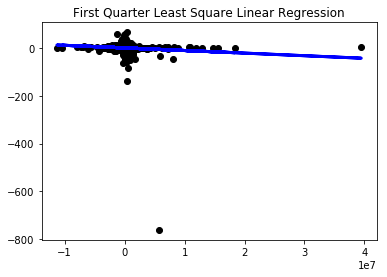

In [20]:
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.scatter(x1, y1,  color='black')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("First Quarter Least Square Linear Regression")
plt.show()

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


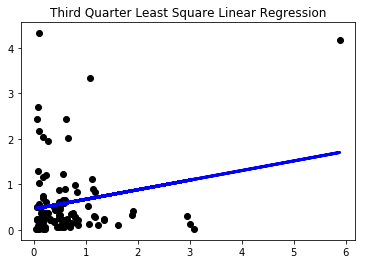

In [39]:
X2 = X[(X['0514-0814chng'] >= 2000000) | (X['0514-0814chng'] < -2000000)]
y1 = (X2['0814price'] - X2['0514price'])/X2['0514price']
y1 = np.abs((y1- np.mean(y1))/np.std(y1))
x1 = np.abs((X2['0514-0814chng'] - np.mean(X2['0514-0814chng']))/np.std(X2['0514-0814chng']))
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.scatter(x1, y1,  color='black')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("Third Quarter Least Square Linear Regression")
plt.show()

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


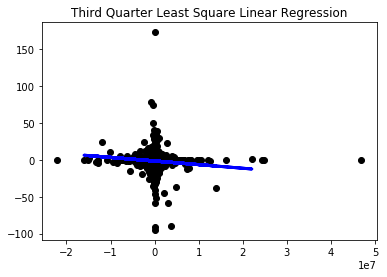

In [22]:
X2 = X[(X['0814-1114chng'] >= 2000) | (X['0814-1114chng'] < -2000)]
y1 = X2['1114price'] - X2['0814price']
x1 = (X2['0814-1114chng'])
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.scatter(x1, y1,  color='black')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("Third Quarter Least Square Linear Regression")
plt.show()

In [23]:
#Second quarter price responds to first quarter stock price
X1 = X[(X['0214-0514chng'] >= 2000) | (X['0214-0514chng'] < -2000)]
y4 = (X1['0814price'] - X2['0514price'])/X2['0514price']
x4 = X1['0214-0514chng']
length = np.size(x1)
x4 = x4.reshape(length, 1)
y4 = y4.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x4, y4)
plt.scatter(x4, y4,  color='black')
plt.plot(x4, regr.predict(x4), color='blue', linewidth=3)
plt.title("First Quarter Least Square Linear Regression")
plt.show()

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


ValueError: cannot reshape array of size 2900 into shape (2845,1)

In [24]:
#Third quarter price responds to first quarter stock price
X1 = X[(X['0214-0514chng'] >= 1000000) | (X['0214-0514chng'] < -1000000)]
y5 = np.abs((X2['1114price'] - X2['0814price'])/X2['0814price'])
x5 = np.abs(X1['0214-0514chng'])
length = np.size(x1)
x5 = x5.reshape(length, 1)
y5 = y5.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x5, y5)
plt.scatter(x5, y5,  color='black')
plt.plot(x5, regr.predict(x5), color='blue', linewidth=3)
plt.title("First Quarter Least Square Linear Regression")
plt.show()

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


ValueError: cannot reshape array of size 252 into shape (2845,1)